In [17]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train_data = pd.read_csv("Data/train.tsv", sep='\t')
test_data = pd.read_csv("Data/test.tsv", sep='\t')
train_data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [8]:
test_data

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [3]:
X = train_data['Phrase']
y = train_data['Sentiment']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state=3000)

X_test = test_data['Phrase']

In [34]:
min_df = range(11)

for m in min_df:
    #create the vocabulary based on the training data
    vect = TfidfVectorizer(min_df=m, ngram_range=(1,2)).fit(X_train)

    #encode the words in X_train and X_test based on the vocabulary
    X_train_vectorized = vect.transform(X_train)
    X_val_vectorized = vect.transform(X_val)
    
    #train the classifier
    model = MultinomialNB(alpha=0.1).fit(X_train_vectorized, y_train)
    
    print(f"min_df: {m}")
    print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
    print("Classification accuracy on validation set: ", model.score(X_val_vectorized, y_val))

min_df: 0
Classification accuracy on training set:  0.7677415737536845
Classification accuracy on validation set:  0.6183519159297706
min_df: 1
Classification accuracy on training set:  0.7677415737536845
Classification accuracy on validation set:  0.6183519159297706
min_df: 2
Classification accuracy on training set:  0.7640811226451365
Classification accuracy on validation set:  0.619281045751634
min_df: 3
Classification accuracy on training set:  0.7574009996155325
Classification accuracy on validation set:  0.6188965782391388
min_df: 4
Classification accuracy on training set:  0.7472846981930027
Classification accuracy on validation set:  0.6182878380110214
min_df: 5
Classification accuracy on training set:  0.7353261566064334
Classification accuracy on validation set:  0.6177111367422786
min_df: 6
Classification accuracy on training set:  0.722614699474561
Classification accuracy on validation set:  0.616557734204793
min_df: 7
Classification accuracy on training set:  0.70999935922

In [35]:
min_df = range(11)

alphas = np.arange(0, 1, 0.1)
alphas = np.delete(alphas, 0)

best_md = None
best_alpha = None
best_train_score = 0
best_val_score = 0
for m in min_df:
    #create the vocabulary based on the training data
    vect = TfidfVectorizer(min_df=m, ngram_range=(1,2)).fit(X_train)

    #encode the words in X_train and X_test based on the vocabulary
    X_train_vectorized = vect.transform(X_train)
    X_val_vectorized = vect.transform(X_val)
    
    for a in alphas:
        model = MultinomialNB(alpha = a).fit(X_train_vectorized, y_train)
        score = model.score(X_val_vectorized, y_val)
        
        if score > best_val_score:
            best_md = m
            best_alpha = a
            best_val_score = score
            best_train_score = model.score(X_train_vectorized, y_train)
            
print(f"Best min_df: {best_md}")
print(f"Best alpha: {best_alpha}")
print(f"Best train score: {best_train_score}")
print(f"Best validation score: {best_val_score}")

Best min_df: 0
Best alpha: 0.4
Best train score: 0.7463956170703575
Best validation score: 0.6323529411764706


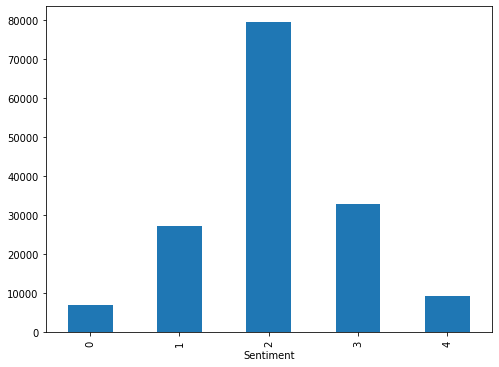

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
train_data.groupby('Sentiment').Phrase.count().plot.bar(ylim=0)
plt.show()